# Part A)
Constructing a fully dense Convonutional Autoencoder

## A.1: Useful Libraries and frameworks

In [ ]:
from sklearn.model_selection import train_test_split                            #Sklearn

import numpy as np                                                              #Numpy

# !pip install idx2numpy                                                        #idx2numpy 
!pip install idx2numpy

import idx2numpy                                                                #Convert dataset from terminal into an array: 60.000 x 28 x 28

import keras                                                                    #Keras
from keras.datasets import mnist                            
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.optimizers import RMSprop

from tensorflow.keras.layers import Conv2D                                      #Tensorflow

import matplotlib.pyplot as plt                                                 #Matplotlib


## A.2: Functions

In [ ]:
def split_dataset(dataset):

  dataset = mnist_normalization(dataset)

  x_train, x_valid, ground_train, ground_valid = train_test_split(dataset, dataset, test_size=0.2, random_state=42)
  return x_train, x_valid, ground_train, ground_valid

def mnist_normalization(dataset):                                               #Fom keras modules (colab)

  dataset = dataset.astype('float32') / 255
  # dataset = dataset.reshape((len(dataset), np.prod(dataset.shape[1:])))
  return dataset

def get_dataset(locationDataset):                                               #For dataset given from user (.py)

  dataset = idx2numpy.convert_from_file(locationDataset)
  return dataset
  

def get_mnistDataset():

  (x_train, _), (x_test, _) = mnist.load_data()
  return x_train

def convLayerMaker(kernel_num, kernel_size, activation, padding, input):

  conv = Conv2D(kernel_num, (kernel_size, kernel_size), activation=activation, padding=padding)(input)      #28 x 28 x 32
  conv = BatchNormalization()(conv)
  return conv

def encoderA(input_img, conv_layers, kernel_size, kernel_num):
  #encoder
  #input = 28 x 28 x 1 (wide and thin)

  for layer in range(conv_layers):

    if(layer==0):
      conv = convLayerMaker(kernel_num*1, kernel_size, 'relu', 'same', input_img )
    
    else:
      if( (layer % 2) ==0 ):
        
        kernel_num = kernel_num*2

        if(layer==2 or layer==4):
          pool = MaxPooling2D(pool_size=(2, 2))(conv) #14 x 14 x 32
          conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', pool)

        else:
          conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', conv)

      else:
        conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', conv)
    
  return conv

  # conv1 = Conv2D(32, (kernel_size, kernel_size), activation='relu', padding='same')(input_img)      #28 x 28 x 32
  # conv1 = BatchNormalization()(conv1)
  # conv1 = Conv2D(32, (kernel_size, kernel_size), activation='relu', padding='same')(conv1)
  # conv1 = BatchNormalization()(conv1)

  # pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32

  # conv2 = Conv2D(64, (kernel_size, kernel_size), activation='relu', padding='same')(pool1)          #14 x 14 x 64
  # conv2 = BatchNormalization()(conv2)
  # conv2 = Conv2D(64, (kernel_size, kernel_size), activation='relu', padding='same')(conv2)
  # conv2 = BatchNormalization()(conv2)

  # pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64

  # conv3 = Conv2D(128, (kernel_size, kernel_size), activation='relu', padding='same')(pool2)         #7 x 7 x 128 (small & thick)
  # conv3 = BatchNormalization()(conv3)
  # conv3 = Conv2D(128, (kernel_size, kernel_size), activation='relu', padding='same')(conv3)
  # conv3 = BatchNormalization()(conv3)

  # conv4 = Conv2D(256, (kernel_size, kernel_size), activation='relu', padding='same')(conv3)         #7 x 7 x 256 (small & thick)
  # conv4 = BatchNormalization()(conv4)
  # conv4 = Conv2D(256, (kernel_size, kernel_size), activation='relu', padding='same')(conv4)
  # conv4 = BatchNormalization()(conv4)

  # return conv4

def decoderA(code, conv_layers, kernel_size, kernel_num):
  #decoder

  for layer in range(conv_layers):

    if(layer==0):
      conv = convLayerMaker(kernel_num*1, kernel_size, 'relu', 'same', code )
    
    else:
      if( (layer % 2) ==0 ):

        kernel_num = kernel_num/2

        if(layer==(conv_layers-2)):
          up = UpSampling2D((2,2))(conv) 
          conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', up)

      else:
        if(layer==(conv_layers-2)):
          up = UpSampling2D((2,2))(conv) 
          conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', up)

        else:
          conv = convLayerMaker(kernel_num, kernel_size, 'relu', 'same', conv)

  up = UpSampling2D((2,2))(conv) #14 x 14 x 64
  conv = Conv2D(1, (kernel_size, kernel_size), activation='sigmoid', padding='same')(up)   
  return conv

  # convi = Conv2D(256, (3, 3), activation='relu', padding='same')(code)         #7 x 7 x 256
  # convi = BatchNormalization()(convi)
  # convi = Conv2D(256, (3, 3), activation='relu', padding='same')(convi)
  # convi = BatchNormalization()(convi)

  # conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(convi)         #7 x 7 x 128
  # conv5 = BatchNormalization()(conv5)
  # conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
  # conv5 = BatchNormalization()(conv5)

  # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)          #7 x 7 x 64
  # conv6 = BatchNormalization()(conv6)
  # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
  # conv6 = BatchNormalization()(conv6)
    
  # up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
  
  # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)            # 14 x 14 x 32
  # conv7 = BatchNormalization()(conv7)
  # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
  # conv7 = BatchNormalization()(conv7)

  # up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
  # decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)        # 28 x 28 x 1

  # return decoded

def createInputImage(x, y, inChannel):

  input_img = keras.Input(shape = (x, y, inChannel))
  return input_img

def initializeModel(input_img, conv_layers, kernel_size, kernel_startnum):
  
  encoder_kernel = kernel_startnum
  decoder_kernel = int(kernel_startnum*pow(2,((conv_layers/4) - 1 )))                    #For example,if we have 16 total Layers => kernel*16/4-1 = kernel*3 = 32*(2^3) = 256

  print(encoder_kernel)
  print(decoder_kernel)

  autoencoder = keras.Model(input_img, decoderA(encoderA(input_img,( int(conv_layers/2)), kernel_size, encoder_kernel), int(conv_layers/2), kernel_size, decoder_kernel ))
  autoencoder.compile(loss='mean_squared_error', optimizer =RMSprop())
  return autoencoder

def trainAutoencoder(x_train, ground_train, x_valid, ground_valid, batch_size, epochs, input_img):

  autoencoder.fit(x_train, ground_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, ground_valid))

def show_error(loss,val_loss, epochs, batch_size, conv_layers, kernel_size, kernel_startnum):

  print("Epochs:",epochs)
  print("Batch size:", batch_size)
  print("Convolutional Layers:", conv_layers)
  print("Kernel size:", kernel_size, "x" , kernel_size)
  print("Kernels per layer:", kernel_startnum )
  plt.plot(loss,'r')
  plt.plot(val_loss,'b')
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

## A.3: Main Program

In [ ]:
# locationDataset = r'/content/train-images-idx3-ubyte'                         #Location to file (.py)
# dataset = get_dataset(locationDataset)                                        #From given file (.py)

#Hyperparameters
epochs            = 20                                                        
batch_size        = 128
conv_layers       = 10
kernel_size       = 3                            
kernel_startnum   = 32

input_img = createInputImage(28,28,1)
dataset = get_mnistDataset()

x_train, x_valid, ground_train, ground_valid = split_dataset(dataset)           #Training data must be split into training set and validtion set

autoencoder = initializeModel(input_img, conv_layers, kernel_size, kernel_startnum)                                  #Initialize our NN Model
autoencoder_train = trainAutoencoder(x_train, ground_train, x_valid, ground_valid, batch_size, epochs, input_img)    #Train our model

32
90
Epoch 1/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0192 - val_loss: 0.0137
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 10/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0014 - 

Epochs: 20
Batch size: 128
Convolutional Layers: 10
Kernel size: 3 x 3
Kernels per layer: 32


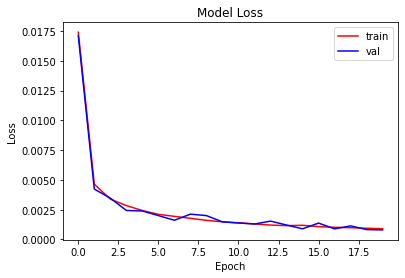

In [4]:
loss      = autoencoder.history.history['loss']
val_loss  = autoencoder.history.history['val_loss']
show_error(loss,val_loss, epochs, batch_size, conv_layers, kernel_size, kernel_startnum)

##A.4: Saving the model

In [6]:
autoencoder.save('autoencoder.h5')
autoencoder.save_weights('autoencoder_weights.h5')

# B.1: Useful Libraries and frameworks

In [7]:
import sys
import keras
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, UpSampling2D, BatchNormalization, Conv2D
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.utils import np_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# B.2 Useful functions

## B.2.1 Function to read argumnents from command line for hyperparameters values.

In [8]:
def get_arguments():                    #function to get command line arguments regarding dataset folder 
    training_dataset = ""
    training_labels = ""
    test_dataset = ""
    test_labels = ""
    model = ""

    if len(sys.argv) != 6:
        print("Please re-run with correct arguments.")
        sys.exit()

    for i in range(len(sys.argv)):
        if sys.argv[i] == "-d":
            training_dataset = sys.argv[i+1]
        elif sys.argv[i] == "-dl":
            training_labels = sys.argv[i + 1]
        elif sys.argv[i] == "-t":
            test_dataset = sys.argv[i + 1]
        elif sys.argv[i] == "-tl":
            test_labels = sys.argv[i + 1]
        elif sys.argv[i] == "-model":
            model = sys.argv[i + 1]
    return trainind_dataset, training_labels, test_dataset, test_labels, model

In [9]:
def get_hyperparameters():

  filters = ""
  filter_size = ""
  layers = ""
  epochs = ""
  batch_size = ""
  fc = ""

  for i in range(len(sys.argv)):
    if sys.argv[i] == "-fc":
        fc = sys.argv[i+1]
    elif sys.argv[i] == "-f":
        filters = sys.argv[i + 1]
    elif sys.argv[i] == "-s":
        filter_size = sys.argv[i + 1]
    elif sys.argv[i] == "-l":
        layers = sys.argv[i + 1]
    elif sys.argv[i] == "-e":
        epochs = sys.argv[i + 1]
    elif sys.argv[i] == "-b":
        batch_size = sys.argv[i + 1]

  return filters, filter_size, layers, epochs, batch_size, fc

# B.2.4 Define fully connected layers 

In [10]:
def fc(encoded,num, num_classes):
    flat = Flatten()(encoded)
    den = Dense(num, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

# B.4 Load train and test data

In [11]:
from keras.datasets import mnist

(x_train, train_labels), (x_test, test_labels) = mnist.load_data()     #get_arguments() 

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# B.8 Convert labels into one-hot encoding vectors
one-hot encoding is used to convert the categorical data into a vectror of numbers and it is necessary because machine learning algorithms cannot work with categorical data directly

In [12]:
n_classes = 10          #maybe make classes a hyperparameter
y_train = np_utils.to_categorical(train_labels, n_classes)          
y_test = np_utils.to_categorical(test_labels, n_classes) 

# B.9 Split data to training and validation for classification

In [13]:
train_X,valid_X,train_label,valid_label = train_test_split(x_train ,y_train,test_size=0.2,random_state=13)

# B.10 Classification Model

In [14]:
# encode = encoder(input_img)
encode = encoderA(input_img, int(conv_layers/2), kernel_size, kernel_startnum)

encoder_kernel = kernel_startnum
decoder_kernel = int(kernel_startnum*pow(2,((conv_layers/4) - 1 )))
autoencoderb = keras.Model(input_img, decoderA(encoderA(input_img,( int(conv_layers/2)), kernel_size, encoder_kernel), int(conv_layers/2), kernel_size, decoder_kernel ))

# encoderA(input_img,( int(conv_layers/2)), kernel_size, encoder_kernel)

full_model = keras.Model(input_img,fc(encode, 256, 10))

# autoencoderb = load_model('/content/autoencoder.h5')
autoencoderb.load_weights('autoencoder_weights.h5')

# print(autoencoderb.get_weights()[0][1])

for l1,l2 in zip(full_model.layers[:conv_layers],autoencoderb.layers[0:conv_layers]):
    l1.set_weights(l2.get_weights())

for layer in full_model.layers[0:conv_layers]:                                  #this model is already trained, so we won't train it again
    layer.trainable = False

full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

full_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       

# B.11 Train and save classification model

In [15]:
classify_train = full_model.fit(train_X, train_label, batch_size=batch_size ,epochs=epochs ,verbose=1,validation_data=(valid_X, valid_label))

full_model.save_weights('autoencoder_classification.h5')

for layer in full_model.layers[0:conv_layers]:         #retrain the entire model this time
    layer.trainable = True

full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

classify_train = full_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

full_model.save_weights('classification_complete.h5')

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1426 - accuracy: 0.9576 - val_loss: 0.1001 - val_accuracy: 0.9701
Epoch 2/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0726 - val_accuracy: 0.9780
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 4/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0732 - val_accuracy: 0.9805
Epoch 5/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0624 - val_accuracy: 0.9845
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0896 - val_accuracy: 0.9774
Epoch 7/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0910 - val_accuracy: 0.9808
Epoch 

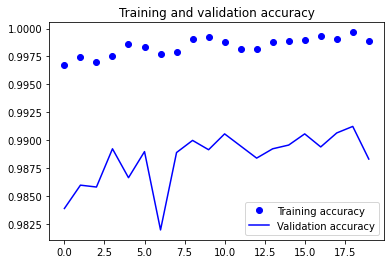

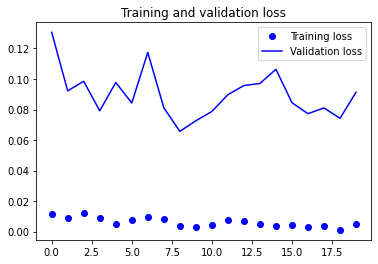

In [16]:
#this was supposed to help us find out if there is overfitting by showing us the loss between validation and training - MAYBE DELETE?

accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epoches = range(len(accuracy))
plt.plot(epoches, accuracy, 'bo', label='Training accuracy')
plt.plot(epoches, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoches, loss, 'bo', label='Training loss')
plt.plot(epoches, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# B.12 Evaluate Model

In [17]:
test_eval = full_model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.09954018145799637
Test accuracy: 0.9891999959945679


# B.13 Predict Labels

B.13.1 Correct predictions

Correct labels found:  9892


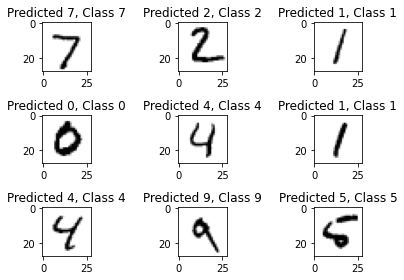

In [18]:
predicted_classes = full_model.predict(x_test)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
# fig, axis = plt.subplots(4, 4, figsize=(12, 14))
correct = np.where(predicted_classes==test_labels)[0]
print("Correct labels found: ", len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='binary')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

B.13.2 Incorrent Predictions

Incorrect labels found:  108


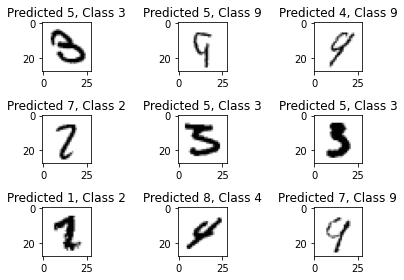

In [19]:
  incorrect = np.where(predicted_classes!=test_labels)[0]
  print("Incorrect labels found: ", len(incorrect))
  for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='binary')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

B.13.2 Classification Report

In [20]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.99      0.98      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.98      1.00      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.97      1.00      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

